$\cal{Balty}$ $\cal{François}$, $\cal{Dandoy}$ $\cal{Virgile}$

# Travail personel de Mécanique Quantique 


Dans ce travail, nous cherchons à déterminer le comportement d'un fluide dominé par des forces hautement visqueuses.
Pour ce faire, nous allons résoudre l'équation biharmonique sur un domaine à deux dimensions: un carré de longueur 1 avec les sommets situés en (x,y): (0,0), (1,0), (1,1) et (0,1).


## Discrétisation de l'équation biharmonique 


Nous partons de l'équation biharmonique à 2 dimensions: 

$$ \nabla^4 \psi=0= \left( \frac{\partial^4 }{\partial x^4}+\frac{\partial^4 }{\partial y^4}+2\frac{\partial ^4}{\partial x^2 \partial y^2} \right) \psi  $$

Ensuite, on discretise les dérivées en suivant une "second order, central finite difference". Pour cela, rappelons que:

$$
\frac{\partial^4 f(x_i)}{\partial x^4} = \frac{f(x_{i-2})-4f(x_{i-1})+6f(x_i)-4f(x_{i+1})+f(x_{i+2})}{\Delta x^4}
$$
et

$$
\frac{\partial^4 f(x_i,y_{j})}{\partial x^2 \partial y^2} = \frac{1}{\Delta x^2 \Delta y^2}\left( f(x_{i-1},y_{j-1})-2f(x_{i},y_{j-1}) + f(x_{i+1},y_{j-1})- 2 f(x_{i-1},y_{j}) + 4 f(x_i,y_{j})- 2 f (x_{i+1},y_{j}) +f(x_{i-1},y_{j+1}) - 2 f (x_{i},y_{j+1}) +f(x_{i+1},y_{j+1}) \right)
$$

Maintenant, discretisons (attention, le nombre de termes sera impressionnant):

$$
\frac{\psi_{i-2,j}-4\psi_{i-1,j}+6\psi_{i,j}-4\psi_{i+1,j}+\psi_{i+2,j}}{\Delta x^4}+\frac{\psi_{i,j-2}-4\psi_{i,j-1}+6\psi_{i,j}-4\psi_{i,j+1}+\psi_{i,j+2}}{\Delta y^4} + 2\left(\frac{\psi_{i-1,j-1}-2\psi_{i,j-1} + \psi_{i+1,j-1}- 2 \psi_{i-1,j} + 4 \psi_{i,j}- 2 \psi_{i+1,j} +\psi_{i-1,j+1}-2\psi_{i,j+1}+\psi_{i+1,j+1}}{\Delta x^2 \Delta y^2}\right)=0
$$

Dans notre résolution numérique, nous prendrons $ \Delta x= \Delta y$, ce qui nous permet de simplifier notre expression ci-dessus. Nous pouvons exprimer notre équation après la discrétisation:

$$ \nabla^4 \psi^k = \frac{ 20\psi_{i,j}^k +(\psi_{i,j-2}^k +2\psi_{i-1,j-1}^k-8\psi_{i,j-1}^k+2\psi_{i+1,j-1}^k + \psi_{i-2,j}^k - 8\psi_{i-1,j}^k - 8\psi_{i+1,j}^k + \psi_{i+2,j}^k +2 \psi_{i-1,j+1}^k-8\psi_{i,j+1}^k +2 \psi_{i+1,j+1}^k + \psi_{i,j+2}^k)}{\Delta x^4} $$

##  Conditions aux bords du problème 

Nous allons dans cette partie implémenter les conditions aux bords du domaine en utilisant une discrétisation du second ordre "forward or backward finite differences". 
Pour tous les cotés, nous disposons d'une condition sur la fonction et sur sa dérivée. Analysons chacun d'entre eux et tentons d'y apporter des équations que nous implémenterons ensuite dans notre résolution numérique.
Nous commençons par le côté en $y=1$ et tournerons dans le sens horlogique:


- Pour ce côté, nous avons les conditions : 

$$
\left\{
    \begin{array}{@{} l c @{}}
      \psi =0  \\
      \frac{\partial \psi}{\partial y}=1 
    \end{array}\right.
$$

Pour rester dans le domaine, discrétisons la dérivée à l'aide de la méthode backward: 

$$\frac{\partial \psi}{\partial y} (i,j) = \frac{3/2\space  \psi_{i,j} -2\space  \psi_{i,j-1} +1/2\space  \psi_{i,j-2}}{\Delta y}$$

Or, on sait de par la condition de Dirichlet $ \psi =0 $, que le terme $\psi_{i,j}$ sera nul, puisqu'il représente la valeur de la fonction sur le côté $y=1$. On peut réécrire notre discrétisation: 

$$\frac{\partial \psi}{\partial y} (i,j) = \frac{-2\space  \psi_{i,j-1} +1/2 \space \psi_{i,j-2}}{\Delta y}$$

Puisque sur le bord $\frac{\partial \psi}{\partial y}=1$ , on obtient un condition sur les valeurs de la fonction à une distance $\Delta y$ du bord donnée par: 

$$\psi_{i,j-1} = 1/4 \space \psi_{i,j-2}-1/2 \Delta y $$

- Passons au côté suivant. Les conditions sont données ici par:

$$
\left\{
    \begin{array}{@{} l c @{}}
      \psi =0  \\
      \frac{\partial \psi}{\partial x}=0 
    \end{array}\right.
$$



Où contrairement au premier côté, la dérivée est cette fois-ci nulle. On se rend compte que pour rester dans le domaine lors de la discrétisation, nous devrons à nouveau utiliser la méthode backward:


$$\frac{\partial \psi}{\partial x} (i,j) = \frac{3/2\space  \psi_{i,j} -2\space  \psi_{i-1,j} +1/2\space  \psi_{i-2,j}}{\Delta x}$$

Ce qui, en considérant nos conditions de bord, nous donne la condition finale: 

$$\psi_{i-1,j} = 1/4 \space \psi_{i-2,j} \space  $$

- Le troisième côté est régi par la condition: 

$$
\left\{
    \begin{array}{@{} l c @{}}
      \psi =0  \\
      \frac{\partial \psi}{\partial y}=0 
    \end{array}\right.
$$



Cette fois nous devrons utiliser la méthode forward pour ne pas sortir du domaine. On obtient: 


$$\frac{\partial \psi}{\partial y} (i,j) = \frac{-3/2\space  \psi_{i,j} +2\space  \psi_{i,j+1} -1/2\space  \psi_{i,j+2}}{\Delta y}$$

Et donc, en incorporant la condition de Dirichlet et de Neumann, nous trouvons:

$$\psi_{i,j+1} = 1/4 \space \psi_{i,j+2}  $$

- Enfin pour le dernier côté, nous pouvons simplement appliquer pour les mêmes raisons qu'aux points précédents, avec la méthode forward. On obtient donc la condition:

$$\psi_{i+1,j} = 1/4 \space \psi_{i+2,j} \space $$




Nous somme à présent prêt à implémenter nos conditions aux bords dans le cardre de notre problème.
Résumons la situation:


$$ \nabla^4 \psi=0$$

$$0\le x \le 1 $$
$$0\le y \le 1 $$

$$\psi =0 \space at\space \space x=0,1 \space \space  y=0,1$$

En oubliant pas les conditions sur les dérivées partielles développées juste au dessus. 


### Brève justification des conditions au bords

Avant d'aller plus loin tentons d'expliquer brièvement l'origine des conditions aux bords que nous venons d'expliciter. Commençons donc par les conditions de Neumann:

On sait que dans notre problème les composantes en $x$ et en $y$ de la vitesse sont représentées au travers de la fonction $\psi$ par la relation:

$$ u = \frac{\partial{\psi}}{\partial{y}} $$

$$ v = -\frac{\partial{\psi}}{\partial{x}} $$


Il est alors évident que si nous souhaitons imposer une vitesse au fluide sur le premier bord de telle sorte que $u=1$, nous devons alors imposer la condition de Neumann suivante:

$$\frac{\partial{\psi}}{\partial{y}} =1$$

Les autres côtés ne subissant pas de déplacement se voient donc obtenir la condition simple suivante:

$$ \frac{\partial{\psi}}{\partial{y}}  = 0 $$

$$ \frac{\partial{\psi}}{\partial{x}} = 0$$

Respectivement selon les bords en $x$ ou $y$.

Pour tenter de comprendre à présent les conditions de Dirichlet sur les bords, nous nous risquons ici à une analogie. 
On peut voir en effet que les vitesses selon $x$ et selon $y$ peuvent être interprétées comme le gradient de la fonction $\psi$ (modulo un signe négatif). Dans ce cas il ne serait pas absurde de comparer la fonction $\psi$ à une courbe de potentiel dans lequel se déplacerait le fluide et donc le gradient donnerait le vecteur vitesse. Cette analogie nous semblera plus évidente lorsque nous réaliserons notre graphe de la fonction et lorsque nous pourrons alors conclure des réelles "courbes de potentiel" présentes. Dans cette optique, le fait d'imposer des conditions de Dirichlet reviendrait à donner un niveau de potentiel nul au bord. Dans la suite nous verrons également qu'en avançant dans le domaine, nous glisserons dans un puit de potentiel causé par le mouvement du bord supérieur. 

Aprés cette parenthèse courte mais nécessaire, revenons au problème numérique.


En nous plaçant dans un système discrétisé avec un certain pas $dx$ et $dy$ nous devrons ainsi implémenter la condition de Dirichlet sur le "premier bord" qui est en réalité le bord au sens propre du terme. La contrainte de Neumann s'applique quant à elle une discrétisation plus loin sur ce que nous appelerons le "second bord". Les élements le long de ce dernier seront alors comme explicité par les équations ci-dessus proportionnels à l'élement à une distance $dx$ ou $dy$ d'eux. 
sachant cela, nous somme à présent prêt à implémenter le tout numériquement. 

## Résolution numérique de l'équation biharmonique

Commeçons par importer les fonctions utiles pour le reste du travail:

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rcParams, cm

Nous allons tenter de résoudre notre problème en utilisant la méthode du gradient conjugué. Commençons donc dans un premier temps par poser nos paramètres et la précision que nous souhaitons atteindre. En particulier, nous attendons une différence entre deux itérations succéssives (en norme L1 à l'aide de la fonction définie ci-dessous) de $ 10^{-8}$.

In [2]:
nx = 41               #Discrétisation en x
ny = 41               #Discrétisation en y

l = 1.
h = 1.

dx = l/(nx-1)         #Pas en x
dy = h/(ny-1)         #Pas en y

l1_target = 1e-8      #Précision attendue 



# Définition de L1norm

def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

Nous pouvons à présent implémenter la méthode des gradients conjugués vue en cours. Il faut cependant faire attention au fait que nous avons ici également des conditions sur les dérivées partielles. Nous allons directement l'incorporer dans l'implémentation de la fonction. Plus spécifiquement, au lieu de restreindre notre domaine à son intérieur sans les "premiers bords" (comme nous l'avons fait dans le cours), nous allons également lui enlever son "second bord". Il faudra dans ce cas veiller à implémenter plus bas les différentes conditions sur ces deux bords afin de compléter notre domaine à chaque boucle.

Avant de passer au code en lui-même, il est également important de noter une chose. Pour cela, rappelons brièvement les étapes de l'algorithme: 

- Nous calculons dans un premier temps le résidu $r^0$ donné par: 

$$ r^0 = b-Ap^0$$

- Ce premier résidu nous donne directement $d^0$:

$$d^0 = r^0$$

- On calcule ensuite alpha par: 

$$\alpha = \frac{r^k\space .r^k}{Ad^k \space. d^k}$$

- A partir de ce que nous venons de calculer nous pouvons à présent trouver  la $p^{k+1}$ fonction: 

$$p^{k+1} = p^k + \alpha d^k$$

- Pour continuer il nous faut renouveller notre valeur de $r^k$ et de $d^k$ et recommencer la boucle: 

$$r^{k+1} = r^k -\alpha A d^k$$

$$d^{k+1} = d^k +\beta d^k$$

où $\beta$ est donné par:

$$\beta = \frac{r^{k+1}\space .r^{k+1}}{r^k \space. r^k}$$


Dans notre cas de figure un problème surgit rapidemment. En effet, nous résolvons une équation qui ne possède aucun terme de source. De telle sorte que si nous posons comme dans le cours que $p^0$ est nulle en tous points, nous obtiendrons dans les étapes suivantes une division par $0$. 
Pour subvenir à ce problème, nous incorporons directement dans notre code les conditions initiales évoquées plus haut. De sorte que celles-ci poserons certaines valeurs non nulles dans notre matrice et solverons le problème de la divergence. Implémentons.

In [3]:
def conjugate_gradient_2d(p, dx, dy, l1_target):

    ny, nx = p.shape
    r  = numpy.zeros((ny,nx))             #Matrice des résidus 
    Ad  = numpy.zeros((ny,nx)) #Consistura la multiplication de A par d
    
    l1_norm = 1        #On commence avec un erreur de 1
    iterations = 0
    l1_conv = []
    
 # première étape consistant à trouver le résidu pour k=0
    
    r[2:-2,2:-2] = -(20*p[2:-2,2:-2]+p[:-4,2:-2] + 2*p[1:-3,1:-3] -8*p[1:-3,2:-2] \
                   +2*p[1:-3,3:-1] + p[2:-2,:-4] -8*p[2:-2,1:-3] - 8*p[2:-2,3:-1]+ p[2:-2,4:]\
                   +2*p[3:-1,1:-3] -8*p[3:-1,2:-2]+2*p[3:-1,3:-1] + p[4:,2:-2])/dx**4
    
    

    d = r.copy()           # d(k=0) = r(k=0)
    d[0,:]=0               #Implémentations des condition de Dirichlet
    d[-1,:]=0
    d[:,0]=0
    d[:,-1]=0
    d[-2,2:-2]=(1/4 * d[-3,2:-2] -1/2*dy)  #Implémentation des conditions sur les dérivées                                      
    d[1,2:-2]=1/4 * d[2,2:-2]  
    d[1:-1,1]=1/4 * d[1:-1,2] 
    d[1:-1,-2]=1/4 * d[1:-1,-3] 

 
 
    
    rho = numpy.sum(r*r)   #On construit notre alpha
    
    
    Ad[2:-2,2:-2] = (20*d[2:-2,2:-2]+d[:-4,2:-2] + 2*d[1:-3,1:-3] -8*d[1:-3,2:-2] \
                   +2*d[1:-3,3:-1] + d[2:-2,:-4] -8*d[2:-2,1:-3] - 8*d[2:-2,3:-1]+ d[2:-2,4:]\
                   +2*d[3:-1,1:-3] -8*d[3:-1,2:-2]+2*d[3:-1,3:-1] + d[4:,2:-2])/dx**4
    sigma = numpy.sum(d*Ad)
  
    
    # Iterations jusqu'a ce qu'on atteigne la précision souhaitée
    while l1_norm > l1_target:
        
            
        pk = p.copy()
        rk = r.copy()
        dk = d.copy()
        
        alpha = rho/sigma
        p = pk+ alpha*dk
        r = rk - alpha*Ad
        
        p2=p.copy()
        
        p[0,:]=0               #Implémentations des condition de Dirichlet
        p[-1,:]=0
        p[:,0]=0
        p[:,-1]=0
        p[-2,2:-2]=(1/4 * p2[-3,2:-2] -1/2*dy)  #Implémentation des conditions sur les dérivées                                      
        p[1,2:-2]=1/4 * p2[2,2:-2]  
        p[1:-1,1]=1/4 * p2[1:-1,2] 
        p[1:-1,-2]=1/4 * p2[1:-1,-3] 
    
 

        
        rhop1 = numpy.sum(r*r)
        beta = rhop1 / rho
   
        rho = rhop1
        
        d = r + beta*dk
        
        d2=d.copy()
        
        
        d[0,:]=0               #Implémentations des condition de Dirichlet
        d[-1,:]=0
        d[:,0]=0
        d[:,-1]=0
        d[-2,2:-2]=(1/4 * d2[-3,2:-2] -1/2*dy)  #Implémentation des conditions sur les dérivées                                      
        d[1,2:-2]=1/4 * d2[2,2:-2]  
        d[1:-1,1]=1/4 * d2[1:-1,2] 
        d[1:-1,-2]=1/4 * d2[1:-1,-3] 




        
        
        
        
        Ad[2:-2,2:-2] = (20*d[2:-2,2:-2]+d[:-4,2:-2] + 2*d[1:-3,1:-3] -8*d[1:-3,2:-2] \
                   +2*d[1:-3,3:-1] + d[2:-2,:-4] -8*d[2:-2,1:-3] - 8*d[2:-2,3:-1]+ d[2:-2,4:]\
                   +2*d[3:-1,1:-3] -8*d[3:-1,2:-2]+2*d[3:-1,3:-1] + d[4:,2:-2])/dx**4
        sigma = numpy.sum(d*Ad)
        
        #On réevalue la précision de notre solution
        
        l1_norm = L1norm(pk,p)
        iterations += 1
        l1_conv.append(l1_norm)
    
    print('Number of CG iterations: {0:d}'.format(iterations))
    return p, l1_conv     

Remarquons alors deux choses importantes. 

La première est que nous avons imposé les mêmes conditions aux bords proposées pour la matrice $p$, à la matrice $d$. Pourquoi est il alors important d'imposer des conditions aux bords à ces deux matrices? 
La réponse réside dans le fait que $p$ se transforme directement à partir de $d$ : 

$$p^{k+1} =p^{k} + \alpha d^k $$

Il parait alors intuitif de donner à $d$ exactement les mêmes propriétés que $p$ si l'on souhaite que cette dernière respecte elle même les conditions aux bords.
Cet aspect est en effet vérifié numériquement, puisque en omettant de fournir à $d$ ces conditions, la solution devient directement dépendante des conditions initiales. Ce qui nous indique bien que notre méthode n'est pas adéquate.

Le second fait important, est l'ambiguité incoutournable des conditions à appliquer sur les quatres coins de notre "second bord". En effet, si chacun des points le long des quatres côtés doit respecter sa condition de Neumann comme montré plus haut, les points sur les coins sont confrontés à deux conditions distinctes. Il a donc fallu faire un choix entre ces deux contraintes. Dans ce travail, nous avons choisi d'imposer aux coins de suivre la condition de Neumann selon l'axe $X$. 

Regardons à présent ce que donne cette fonction après la relaxation. 

Comme dit plus haut, nous devons d'abord inclure les conditions aux bords et pas seulement poser notre solution à k=0 nulle.  

In [4]:
psi_i=numpy.zeros((ny,nx))    #Nous choisissons pour le reste du travail une condition initiale nulle partout 

psi_i[0,:]=0               #Implémentations des condition de Dirichlet
psi_i[-1,:]=0
psi_i[:,0]=0
psi_i[:,-1]=0
psi_i[-2,2:-2]=(1/4 * psi_i[-3,2:-2] -1/2*dy)  #Implémentation des conditions sur les dérivées                                      
psi_i[1,2:-2]=1/4 * psi_i[2,2:-2]  
psi_i[1:-1,1]=1/4 * psi_i[1:-1,2] 
psi_i[1:-1,-2]=1/4 * psi_i[1:-1,-3] 


p, l1_conv = conjugate_gradient_2d(psi_i.copy(),dx, dy, l1_target)

Number of CG iterations: 44738


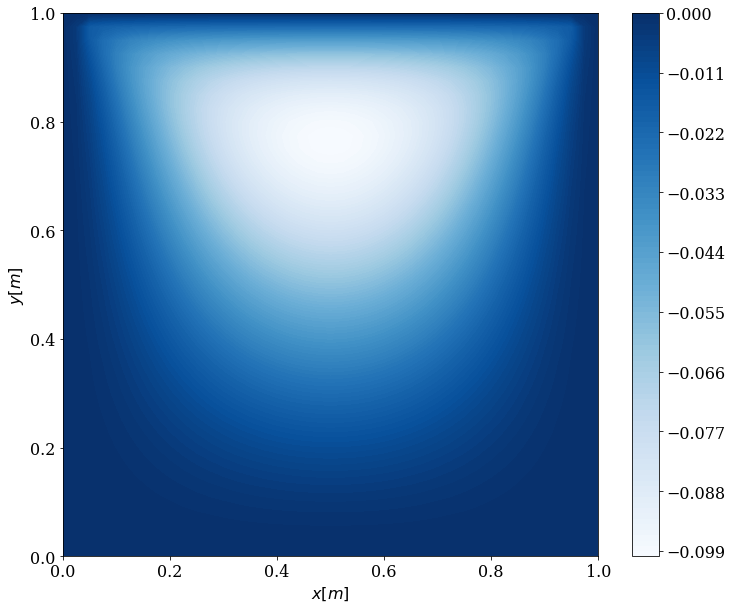

In [5]:
x=numpy.linspace(0,l,nx)
y=numpy.linspace(0,h,ny)

pyplot.figure(figsize=(12,10))
pyplot.contourf(x,y,p,100,cmap=cm.Blues)
pyplot.xlabel('$x [m]$')
pyplot.ylabel('$y [m]$')
pyplot.colorbar();

Notons qu'il nous a fallu 44738 passages dans la boucle pour obtenir la précision souhaitée. Ce nombre d'itérations est relativement élevé pour cette méthode qui excède rarement les 2000 passages. Cette réflexion nous amène à nous demander si l'utilisation des gradients conjugués est adéquate dans le cadre de ce problème.

## Evaluation de $\psi$ en certains points du domaine 
En sachant que la discrétisation est donnée avec $dx=dy=0.025$, regardons la valeur de la fonction stabilisée en les points:

- $(0.6 , 0.2)$


In [6]:
print('psi(0.6,0.2) = ',p[8,24])

psi(0.6,0.2) =  -0.0100320976415


- $(0.6 , 0.4)$

In [7]:
print('psi(0.6,0.4) = ',p[16,24])

psi(0.6,0.4) =  -0.0361474530647


- $(0.6 , 0.6)$

In [8]:
print('psi(0.6,0.6) = ',p[24,24])

psi(0.6,0.6) =  -0.0738191507367


- $(0.6 , 0.8)$

In [9]:
print('psi(0.6,0.8) = ',p[32,24])

psi(0.6,0.8) =  -0.0945138698694


# Conclusion

Nous avons ici résolu une équation de type biharmonique par la méthode des gradients conjugués. Le résultat obtenu en fin de parcours est cohérent avec la représentation de la solution attendue. Néanmoins, nous avons pu noter que le nombre d'itérations pour arriver à une précision de l'ordre de e-8 dépasse grandement l'attente de rapidité de la méthode utilisée. Il est important également de noter que la présence des conditions aux bords de Neumann engendre une ambiguité sur les quatres coins du domaine. Pour illustrer cette ambiguité, on peut par exemple représenter le bilaplacien de la solution finale et observer que les coins ne respecte par tout à fait notre attente d'une valeur nulle en tous points:

In [10]:
def bilaplacian(p0,dx):
    

    
    N =p.shape[0]
    
    Ap = numpy.zeros((N,N))
    
    Ap[2:-2,2:-2] = (20*p[2:-2,2:-2]+p[:-4,2:-2] + 2*p[1:-3,1:-3] -8*p[1:-3,2:-2] \
                   +2*p[1:-3,3:-1] + p[2:-2,:-4] -8*p[2:-2,1:-3] - 8*p[2:-2,3:-1]+ p[2:-2,4:]\
                   +2*p[3:-1,1:-3] -8*p[3:-1,2:-2]+2*p[3:-1,3:-1] + p[4:,2:-2])/dx**4
    
    return Ap
    

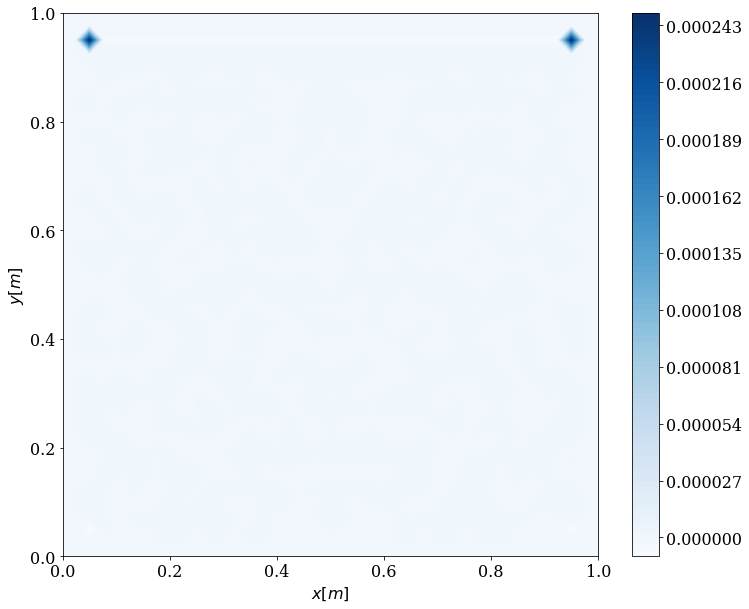

In [11]:
Ap = bilaplacian(p,dx)
x=numpy.linspace(0,l,nx)
y=numpy.linspace(0,h,ny)
pyplot.figure(figsize=(12,10))
pyplot.contourf(x,y,Ap*dx**4,100,cmap=cm.Blues)
pyplot.xlabel('$x [m]$')
pyplot.ylabel('$y [m]$')
pyplot.colorbar();

Le gros de ce travail à donc été d'appréhender ces conditions aux bords. 